### Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.

### Data Set
The Book-Crossing dataset comprises 3 files.

#### 1. Users -
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

#### 2. Books -
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

#### 3.Ratings -
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Datasets
books_df = pd.read_csv("Books.csv")
users_df = pd.read_csv("Users.csv")
ratings_df = pd.read_csv("Ratings.csv")

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Rename the columns
books = books_df.rename(columns={
    'ISBN': 'isbn',
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-S': 'image_url_s',
    'Image-URL-M': 'image_url_m',
    'Image-URL-L': 'image_url_l'
})

# Check the new column names
print(books.columns)

Index(['isbn', 'title', 'author', 'year', 'publisher', 'image_url_s',
       'image_url_m', 'image_url_l'],
      dtype='object')


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Rename the columns
users = users_df.rename(columns={
    'User-ID': 'userid',
    'Location': 'location',
    'Age': 'age',
})

# Check the new column names
print(users.columns)

Index(['userid', 'location', 'age'], dtype='object')


In [7]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Rename the columns
ratings = ratings_df.rename(columns={
    'User-ID': 'userid',
    'ISBN': 'isbn',
    'Book-Rating': 'rating',
})

# Check the new column names
print(ratings.columns)

Index(['userid', 'isbn', 'rating'], dtype='object')


## Descriptive Statistics

In [9]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   isbn         271360 non-null  object
 1   title        271360 non-null  object
 2   author       271359 non-null  object
 3   year         271360 non-null  object
 4   publisher    271358 non-null  object
 5   image_url_s  271360 non-null  object
 6   image_url_m  271360 non-null  object
 7   image_url_l  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
books.isnull().sum()

isbn           0
title          0
author         1
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    3
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userid    278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users.isnull().sum()

userid           0
location         0
age         110762
dtype: int64

In [15]:
# Number of missing values in age column
num_missing=users['age'].isnull().sum()
num_missing

110762

In [16]:
# missing values in percentage
percent_missing=(num_missing/len(users))*100
print(percent_missing)

39.71985741847105


In [17]:
users.duplicated().sum()

0

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userid  1149780 non-null  int64 
 1   isbn    1149780 non-null  object
 2   rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
ratings.isnull().sum()

userid    0
isbn      0
rating    0
dtype: int64

In [20]:
ratings.duplicated().sum()

0

## Exploratory Data Analysis

### Books

In [21]:
# Change the data type of the year column to int
# Change the data type of the publication_year column to int
books['year'] = pd.to_numeric(books['year'], errors='coerce')
books = books[~books['year'].isna()]
books['year'] = books['year'].astype(int)

In [22]:
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [23]:
books.year.describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: year, dtype: float64

In [24]:
books.isna().sum()

isbn           0
title          0
author         1
year           0
publisher      2
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

- There is 1 null value in Author column
- 2 missing values in publisher column

In [25]:
author_na=pd.isnull(books['author'])
books[author_na]

,isbn,title,author,year,publisher,image_url_s,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [26]:
# finding the missing auther name from external refference and replacing
books.loc[187689, 'author'] = 'Larissa Anne Downes'

In [27]:
publisher_na=pd.isnull(books["publisher"])
books[publisher_na]

,isbn,title,author,year,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [28]:
# finding the missing publisher name from external refference and replacing
books.loc[128890,'publisher']='Novelbooks Inc'
books.loc[129037,'publisher']='Bantam'

In [29]:
books.isna().sum()

isbn           0
title          0
author         0
year           0
publisher      0
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

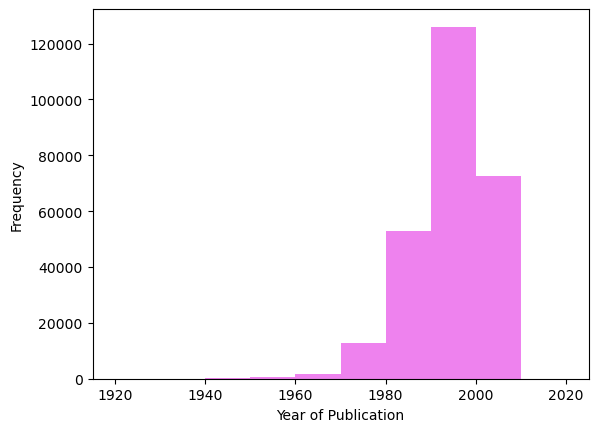

In [30]:
# Check the distribution of the year of publication
plt.hist(books['year'], bins=range(1920, 2030, 10),color="violet")
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Top 10 authors
print("Top 10 Authors-")
print("\n")

top_authors = books['author'].value_counts().head(10)
print(top_authors)

print("\n")

# Top 10 publishers
print("Top 10 Publishers-")
print("\n")

top_publishers = books['publisher'].value_counts().head(10)
print(top_publishers)

Top 10 Authors-


Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: author, dtype: int64


Top 10 Publishers-


Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


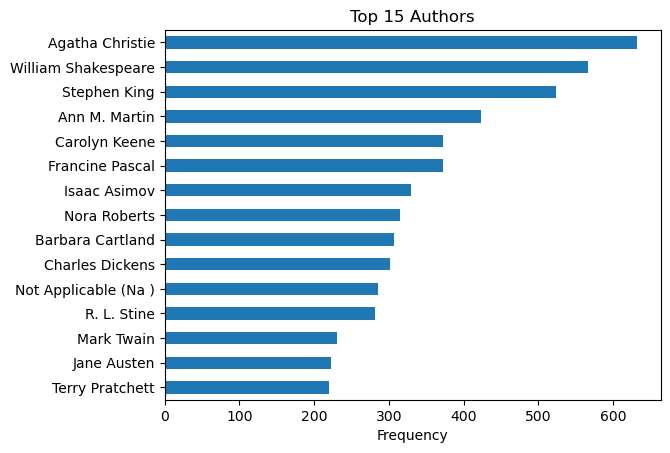

In [32]:
# Identify popular authors
import matplotlib.pyplot as plt

# Top 15 authors
popular_authors = books['author'].value_counts().head(15)
popular_authors.plot.barh()
plt.xlabel('Frequency')
plt.title('Top 15 Authors')

# Reverse the y-axis to show the bars in descending order
plt.gca().invert_yaxis()
    
plt.show()

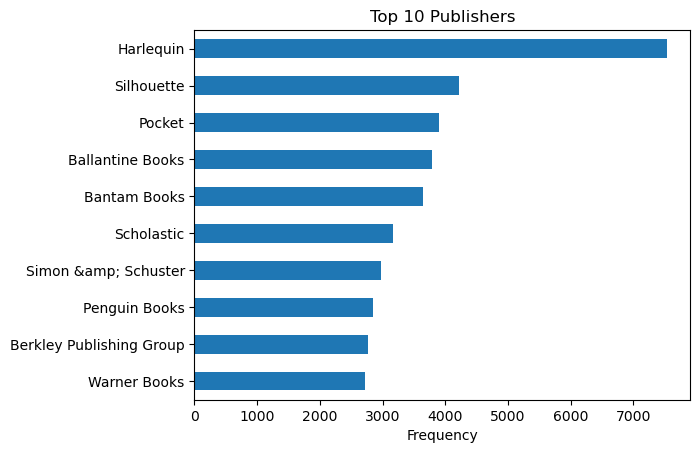

In [33]:
# Top 10 Publishers
popular_publishers = books['publisher'].value_counts().head(10)
popular_publishers.plot.barh()
plt.xlabel('Frequency')
plt.title('Top 10 Publishers')

# Reverse the y-axis to show the bars in descending order
plt.gca().invert_yaxis()
    
plt.show()

### Users

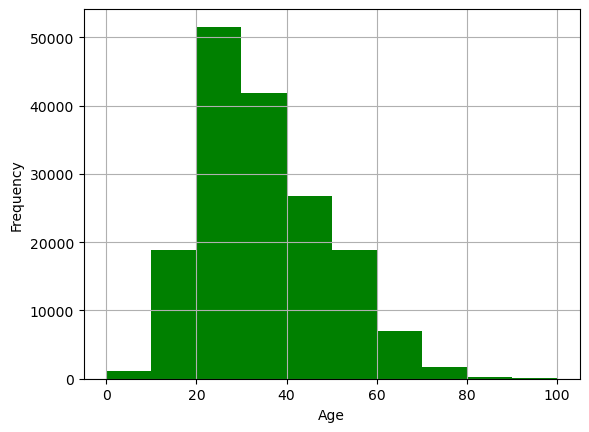

In [34]:
# Check the distribution of age
users['age'].hist(bins=range(0, 110, 10),color="green")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [35]:
median_age=users['age'].median()
median_age

32.0

In [36]:
# Replacing all null values with median
users['age']=users['age'].fillna(median_age)
users['age'].isnull().sum()

0

In [37]:
def age_group(age):
    if age<18:
        x='Children'
    elif age>=18 and age<35:
        x='Youth'
    elif age>=35 and age<65:
        x='Adults'
    else:
        x='Senior Citizens'
    return x

In [38]:
users['age_group']=users['age'].apply(lambda x: age_group(x))
users.head()

,userid,location,age,age_group
0,1,"nyc, new york, usa",32.0,Youth
1,2,"stockton, california, usa",18.0,Youth
2,3,"moscow, yukon territory, russia",32.0,Youth
3,4,"porto, v.n.gaia, portugal",17.0,Children
4,5,"farnborough, hants, united kingdom",32.0,Youth


Text(0.5, 1.0, 'Age Distribution')

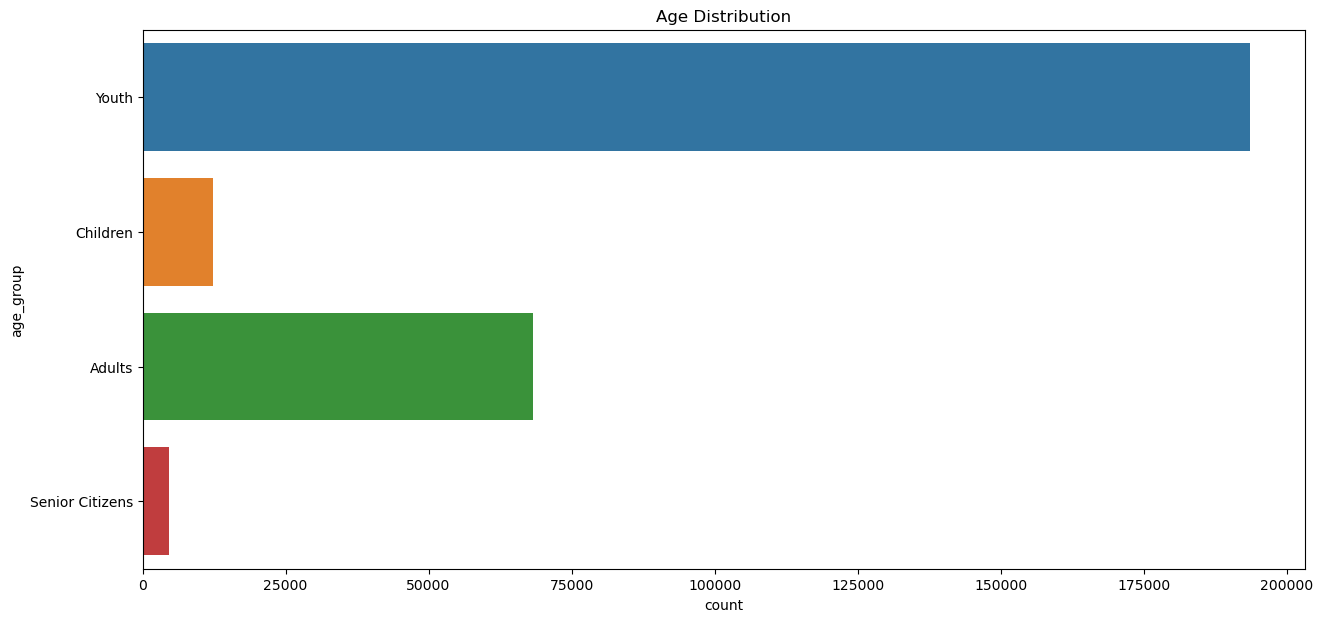

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(y='age_group',data=users)
plt.title('Age Distribution')

In [40]:
users.location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

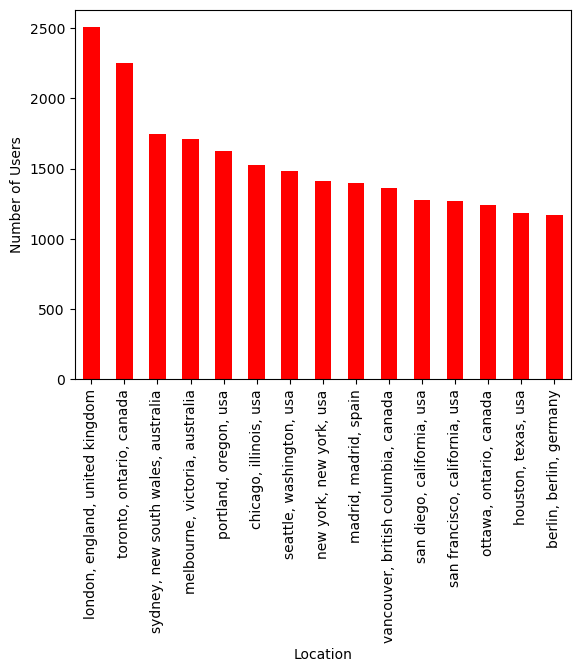

In [41]:
# Users by Location
users_by_location = users['location'].value_counts().head(15)
users_by_location.plot(kind='bar',color="red")
plt.xlabel('Location')
plt.ylabel('Number of Users')

plt.show()

In [42]:
import re

# Define a function to extract country name
def extract_country(location):
    country = re.findall(r'\,+\s?(\w*\s?\w*)\"*$', location)
    if country:
        return country[0]
    else:
        return None

# Apply the function to the location column
users['country'] = users['location'].apply(extract_country)

In [43]:
users.isnull().sum()

userid         0
location       0
age            0
age_group      0
country      368
dtype: int64

In [44]:
users['country']=users['country'].astype('str')

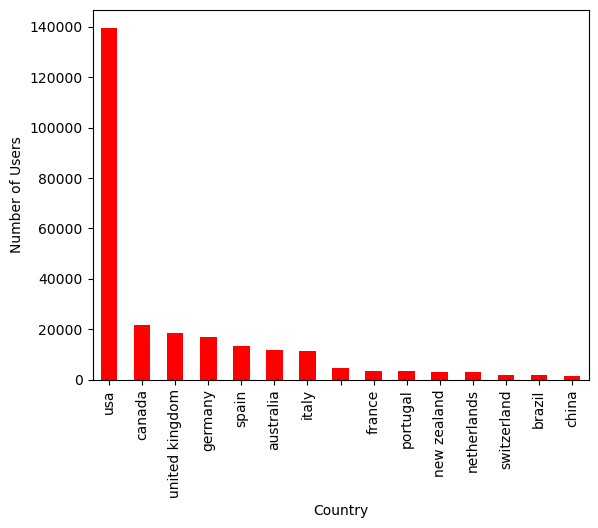

In [45]:
# Users by Country
users_by_location = users['country'].value_counts().head(15)
users_by_location.plot(kind='bar',color="red")
plt.xlabel('Country')
plt.ylabel('Number of Users')

plt.show()

### Ratings

In [46]:
ratings.rating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: rating, dtype: int64

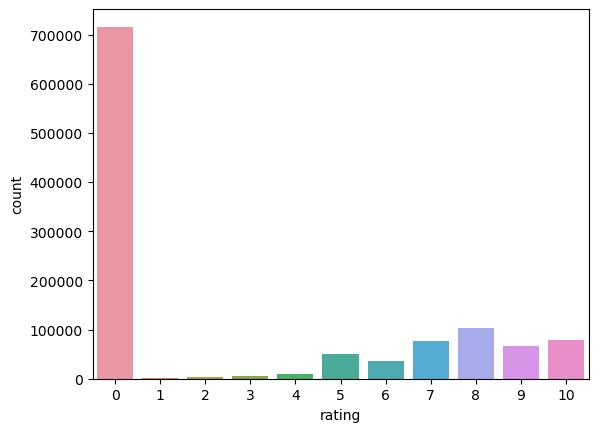

In [47]:
# Distribution of ratings
sns.countplot(x='rating', data=ratings)
plt.show()

## Relation Between Book and Ratings

In [48]:
# Merge the datasets
data = pd.merge(ratings, books, on='isbn')
data

,userid,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
196821,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
196822,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...
196823,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...
196824,276681,1931333246,10,Chorus,Kurt Messick,2003,Dry Bones Press,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...


In [49]:
data.isnull().sum()

userid         0
isbn           0
rating         0
title          0
author         0
year           0
publisher      0
image_url_s    0
image_url_m    0
image_url_l    0
dtype: int64

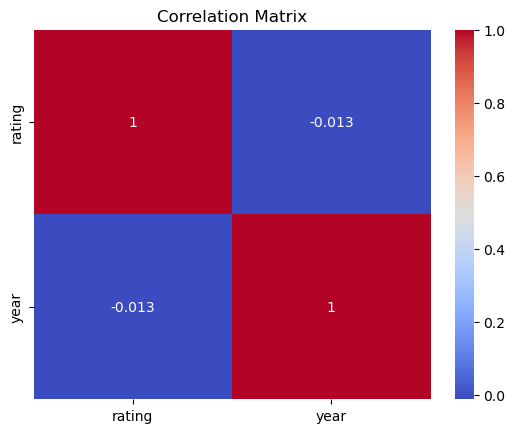

In [50]:
# explore relationships between columns

# Correlation matrix
corr = data[['rating', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [51]:
ratings_df = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_df.rename({'rating':'Mean Ratings'}, axis=1 , inplace =True)
ratings_df['No of times Rated'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings_df

,Mean Ratings,No of times Rated
title,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",5.000000,10
Final Fantasy Anthology: Official Strategy Guide (Brady Games),5.000000,4
Flight of Fancy: American Heiresses (Zebra Ballad Romance),4.000000,2
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",1.250000,4
Mystery Mile,0.000000,2
...,...,...
Ã?Â?lpiraten.,0.000000,2
Ã?Â?rger mit Produkt X. Roman.,5.250000,4
Ã?Â?sterlich leben.,7.000000,1


<Figure size 1000x400 with 0 Axes>

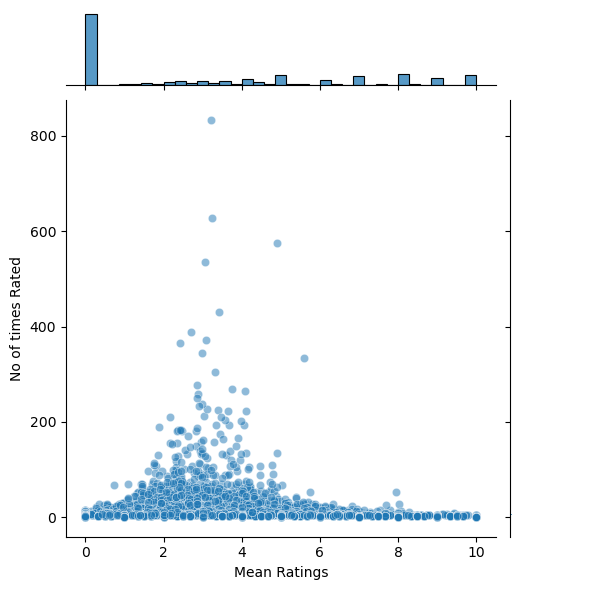

In [52]:
plt.figure(figsize=(10,4), dpi=100)
sns.jointplot(x='Mean Ratings',y='No of times Rated',data=ratings_df,alpha=0.5)
plt.show()

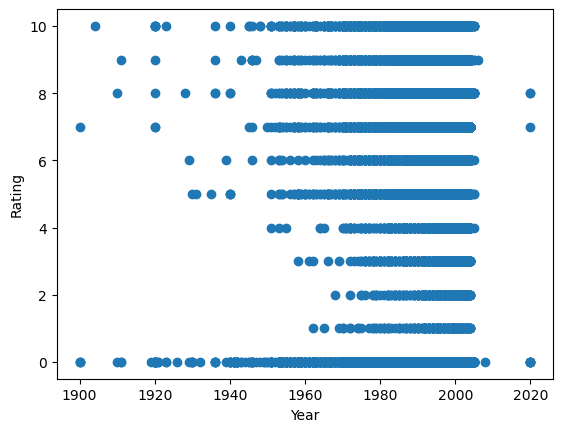

In [53]:
# Create a scatter plot
import matplotlib.pyplot as plt

# Filter the dataframe to include only books published between 1900 and 2025
df_filtered = data[(data["year"] >= 1900) & (data["year"] <= 2025)]

# Create a scatter plot of ratings versus year
plt.scatter(df_filtered["year"], df_filtered["rating"])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

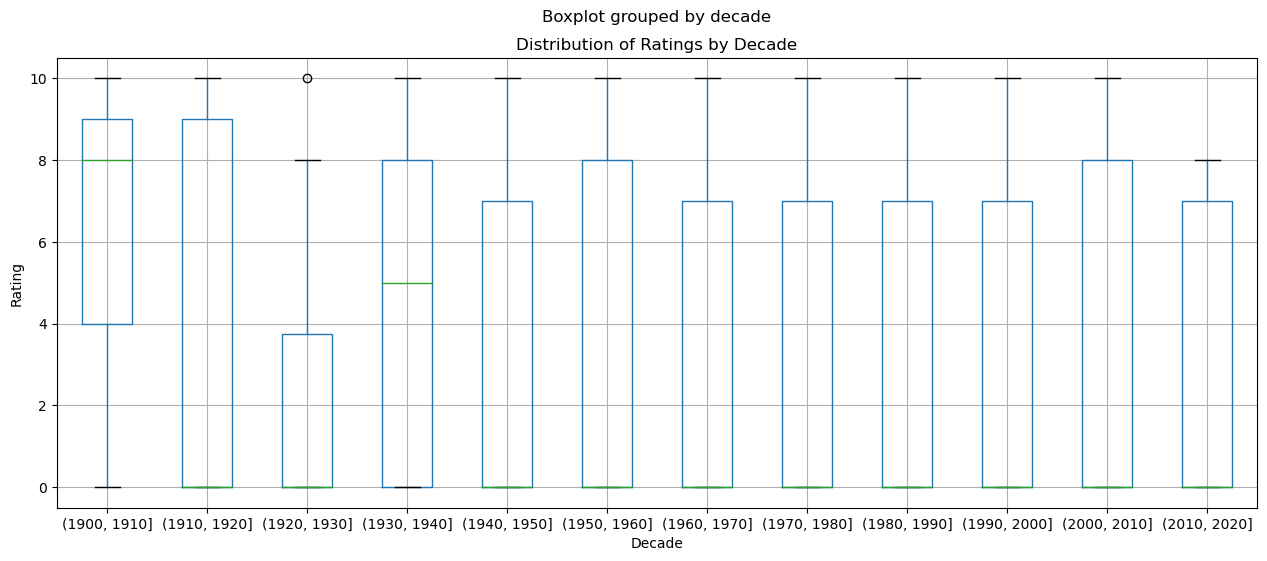

In [54]:
# Group the data by decade
data['decade'] = pd.cut(data['year'], bins=range(1900, 2030, 10))

# Create a box plot for each decade
data.boxplot(column='rating', by='decade', figsize=(15, 6))

# Set the axis labels and title
plt.xlabel("Decade")
plt.ylabel("Rating")
plt.title("Distribution of Ratings by Decade")

# Show the plot
plt.show()

In [55]:
popular_books = pd.DataFrame(data.groupby('title')['rating'].count())
most_popular = popular_books.sort_values('rating', ascending=False)
most_popular.rename({'rating':'No of times Rated'}, axis=1, inplace=True)
most_popular.head(10)

,No of times Rated
title,
A Painted House,833
Snow Falling on Cedars,627
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575
The Firm,535
The No. 1 Ladies' Detective Agency (Today Show Book Club #8),431
The Rainmaker,388
The Bridges of Madison County,371
The Perfect Storm : A True Story of Men Against the Sea,365
STONES FROM THE RIVER,345


<Figure size 2400x1600 with 0 Axes>

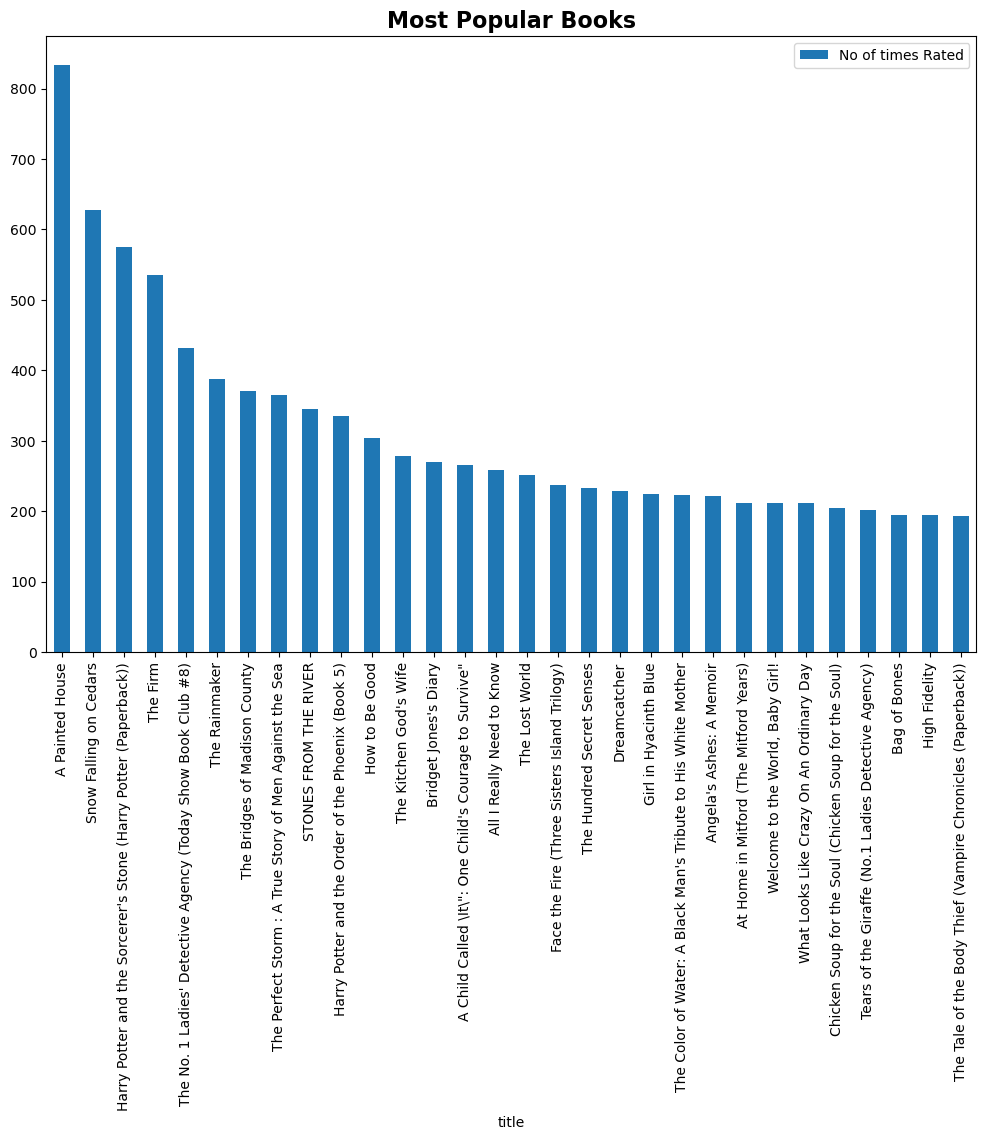

In [56]:
plt.figure(figsize=(12,8), dpi=200)
most_popular.head(30).plot(kind = "bar",figsize=(12,8))
plt.title('Most Popular Books',  fontsize = 16, fontweight = 'bold')
plt.show()

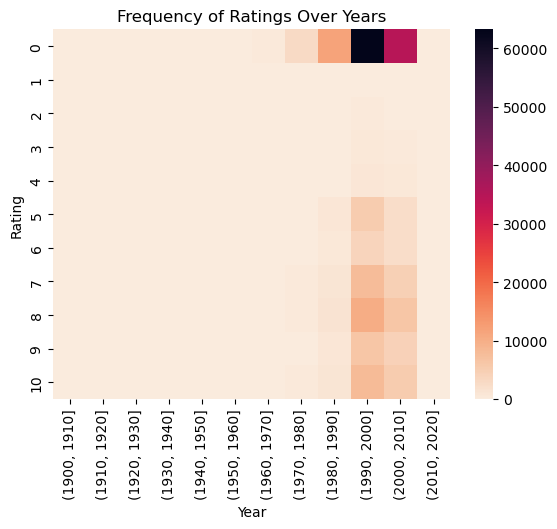

In [57]:
# Heatmap
data['decade'] = pd.cut(data['year'], bins=range(1900, 2030, 10))
rating_freq = data.pivot_table(index='rating', columns='decade', values='isbn', aggfunc='count')

cmap = sns.cm.rocket_r 
sns.heatmap(rating_freq, cmap=cmap)
plt.title("Frequency of Ratings Over Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

In [58]:
# Final Data
final_data = pd.merge(users, data, on='userid')
final_data

,userid,location,age,age_group,country,isbn,rating,title,author,year,publisher,image_url_s,image_url_m,image_url_l,decade
0,8,"timmins, ontario, canada",32.0,Youth,canada,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,"(2000, 2010]"
1,8,"timmins, ontario, canada",32.0,Youth,canada,080652121X,0,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,"(1990, 2000]"
2,8,"timmins, ontario, canada",32.0,Youth,canada,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,"(1990, 2000]"
3,8,"timmins, ontario, canada",32.0,Youth,canada,1558746218,0,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,"(1990, 2000]"
4,8,"timmins, ontario, canada",32.0,Youth,canada,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196821,278851,"dallas, texas, usa",33.0,Youth,usa,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...,"(1990, 2000]"
196822,278851,"dallas, texas, usa",33.0,Youth,usa,1566910102,0,Oregon Handbook (The Americas Series),Stuart Warren,1995,Pub Group West,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...,"(1990, 2000]"
196823,278851,"dallas, texas, usa",33.0,Youth,usa,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,"(1990, 2000]"
196824,278851,"dallas, texas, usa",33.0,Youth,usa,1885071213,7,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,Sequoia Publishing,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...,"(1990, 2000]"


In [59]:
final_data.shape

(196826, 15)

In [60]:
final_data.isnull().sum()

userid            0
location          0
age               0
age_group         0
country           0
isbn              0
rating            0
title             0
author            0
year              0
publisher         0
image_url_s       0
image_url_m       0
image_url_l       0
decade         5182
dtype: int64

In [61]:
final_df = final_data.drop(['decade', 'age_group', 'image_url_s', 'image_url_l'], axis=1)
final_df

,userid,location,age,country,isbn,rating,title,author,year,publisher,image_url_m
0,8,"timmins, ontario, canada",32.0,canada,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...
1,8,"timmins, ontario, canada",32.0,canada,080652121X,0,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...
2,8,"timmins, ontario, canada",32.0,canada,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...
3,8,"timmins, ontario, canada",32.0,canada,1558746218,0,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...
4,8,"timmins, ontario, canada",32.0,canada,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...
...,...,...,...,...,...,...,...,...,...,...,...
196821,278851,"dallas, texas, usa",33.0,usa,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson,http://images.amazon.com/images/P/1558531025.0...
196822,278851,"dallas, texas, usa",33.0,usa,1566910102,0,Oregon Handbook (The Americas Series),Stuart Warren,1995,Pub Group West,http://images.amazon.com/images/P/1566910102.0...
196823,278851,"dallas, texas, usa",33.0,usa,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...
196824,278851,"dallas, texas, usa",33.0,usa,1885071213,7,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,Sequoia Publishing,http://images.amazon.com/images/P/1885071213.0...


In [62]:
final_df.to_csv('final_data.csv', index=False)